Import liblaries

In [1]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

Define data frame and show informations

In [2]:
df = pd.read_csv("Pokemon.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


Remove first 2 column from df and return first 5 rows

In [3]:
df = df.iloc[:, 2:]
df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Grass,Poison,525,80,82,83,100,100,80,1,False
3,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Fire,NaN,309,39,52,43,60,50,65,1,False


Write function to binarization legendary column

In [4]:
def tobi(x):
    if x:
        return 1
    return 0    

In [5]:
df['Legendary'] = df['Legendary'].apply(tobi)


Show null cells count of each column

In [6]:
df.isnull().sum()

Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Replace null values with mode of column

In [7]:
type2_mode = df['Type 2'].mode()
upd_df = df.fillna(type2_mode[0])

In [8]:
upd_df.isna().sum()

Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

Make Scatter matrix of df

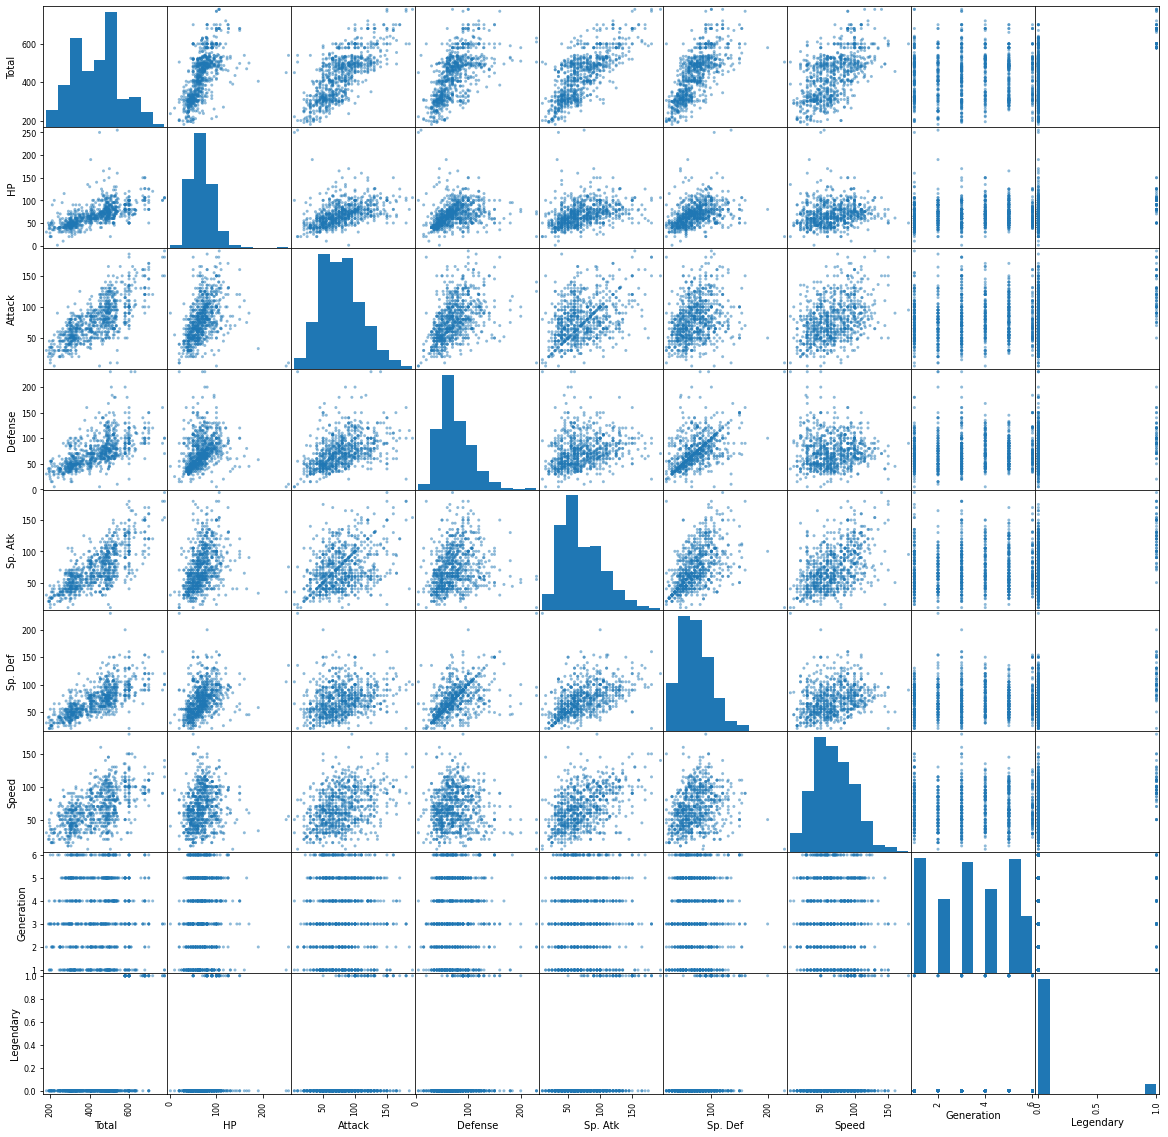

In [11]:
pd.plotting.scatter_matrix(upd_df.iloc[:, 2:], figsize=(20, 20));

Prepare text format data to model with $label encoder$

In [13]:
upd_df['Type 1'] = pd.Categorical(upd_df['Type 1'])
upd_df['Type 2'] = pd.Categorical(upd_df['Type 2'])
upd_df['Type 2'] = upd_df['Type 2'].cat.codes
upd_df['Type 1'] = upd_df['Type 1'].cat.codes

le = LabelEncoder()
upd_df['Type 1'] = le.fit_transform(upd_df['Type 1'])
upd_df['Type 2'] = le.fit_transform(upd_df['Type 2'])

# lb = LabelBinarizer()
# upd_df['Type 1'] = lb.fit_transform(upd_df['Type 1'])
# upd_df['Type 2'] = lb.fit_transform(upd_df['Type 2'])

Split data into train and test sets

In [14]:
training_data, testing_data = train_test_split(upd_df, train_size=0.2, random_state=0)

Split data to input and output values

In [15]:
X_train = training_data.iloc[:, :10] 
y_train = training_data.iloc[:, 10]
X_test = testing_data.iloc[:, :10] 
y_test = testing_data.iloc[:, 10]

Show 5 rows of training set

In [17]:
X_train.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
528,15,16,525,60,55,145,75,150,40,4
621,1,5,488,65,90,115,45,115,58,5
461,0,7,424,70,94,50,94,50,66,4
598,5,7,465,120,100,85,30,85,45,5
139,17,7,200,20,10,55,15,20,80,1


Create several models to see which one is better

In [18]:
model1 = MultinomialNB()
model2 = LogisticRegression()
model3 = KNeighborsClassifier()
model4 = svm.SVC()
model5 = DecisionTreeClassifier()

Fit data into models

In [19]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
model5.fit(X_train, y_train)

C:\Users\diasa\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

See result: Best one is SVM model

In [20]:
print(model1.score(X_test, y_test))
print(model2.score(X_test, y_test))
print(model3.score(X_test, y_test))
print(model4.score(X_test, y_test))
print(model5.score(X_test, y_test))

0.809375
0.8703125
0.9203125
0.93125
0.9125
